In [4]:
import pandas as pd
df_data = pd.read_csv("train.csv")
df_data.head()


,date,store,item,sales
0,1/1/2017,1,1,19
1,1/2/2017,1,1,15
2,1/3/2017,1,1,10
3,1/4/2017,1,1,16
4,1/5/2017,1,1,14


In [5]:
import data_preprocessor
from data_preprocessor import DataPreProcessor
instance = DataPreProcessor()
clean_data =  instance.cleanData(df_sales=df_data)


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(clean_data.sales, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   47
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -592.381
Date:                Sat, 27 Apr 2024   AIC                           1192.761
Time:                        23:47:39   BIC                           1200.076
Sample:                             0   HQIC                          1195.501
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9569      0.044    -21.883      0.000      -1.043      -0.871
ma.L1          1.5387      0.144     10.694      0.000       1.257       1.821
ma.L2          0.6423      0.153      4.190      0.0

In [8]:
model = ARIMA(clean_data.sales, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   47
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -597.519
Date:                Sat, 27 Apr 2024   AIC                           1201.038
Time:                        23:48:07   BIC                           1206.524
Sample:                             0   HQIC                          1203.093
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4530      0.623      0.727      0.467      -0.768       1.674
ma.L1         -0.2001      0.658     -0.304      0.761      -1.489       1.089
sigma2      1.212e+10   4.85e-11    2.5e+20      0.0

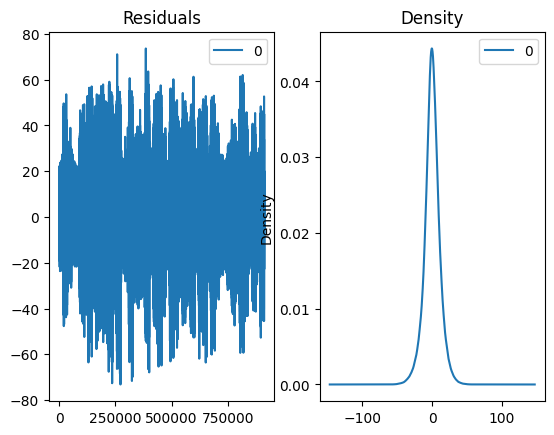

In [8]:
import matplotlib.pyplot as plt
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

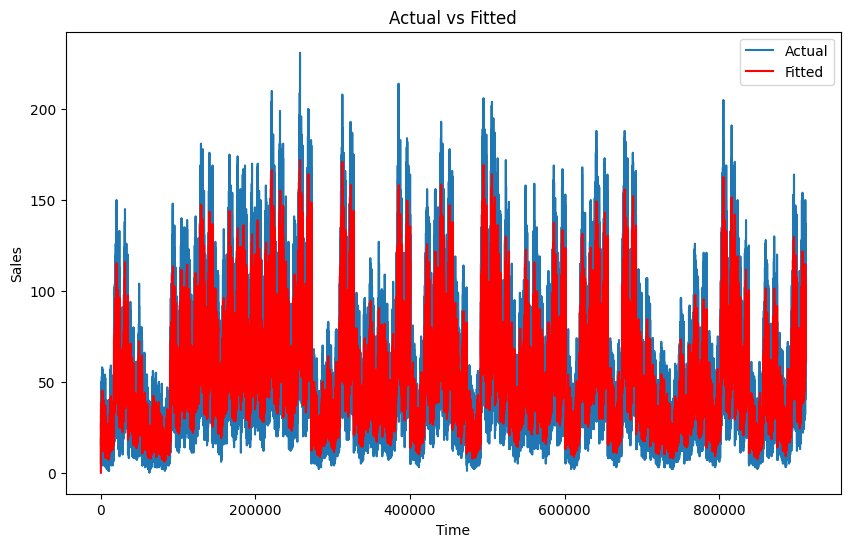

In [9]:
# Get the fitted values
fitted_values = model_fit.fittedvalues

# Plot actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(df_data.sales, label='Actual')
plt.plot(fitted_values, color='red', label='Fitted')
plt.title('Actual vs Fitted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [58]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(df_data.sales, fitted_values)
mape = mean_absolute_percentage_error(df_data.sales, fitted_values)
me = np.mean(df_data.sales - fitted_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Error (ME):", me)

Mean Absolute Error (MAE): 8.32681065402907
Mean Absolute Percentage Error (MAPE): 58009824648.10892
Mean Error (ME): 0.0005026268680894793


In [10]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_data.sales[:85]
test = df_data.sales[85:]

In [9]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast
fc, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: name 'train' is not defined

In [24]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc = fitted.forecast(steps=119)  # Forecasted values

# Confidence intervals
conf = fitted.get_forecast(steps=119).conf_int()  # Confidence intervals


test_index = test.index

# Make as pandas series
fc_series = pd.Series(fc, index=test_index)
lower_series = pd.Series(conf[:, 0], index=test_index)
upper_series = pd.Series(conf[:, 1], index=test_index)
# Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -263.540
Date:                Sat, 27 Apr 2024   AIC                            537.080
Time:                        21:55:56   BIC                            549.174
Sample:                             0   HQIC                           541.938
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8170      0.142     -5.766      0.000      -1.095      -0.539
ar.L2         -0.5515      0.162     -3.415      0.001      -0.868      -0.235
ar.L3         -0.2192      0.139     -1.571      0.1

InvalidIndexError: (slice(None, None, None), 0)

In [25]:
import numpy as np 
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

ValueError: operands could not be broadcast together with shapes (119,) (911454,) 

In [31]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df_data.sales, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6988848.867, Time=82.90 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10042146.731, Time=5.81 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7412177.003, Time=7.22 sec


KeyboardInterrupt: 

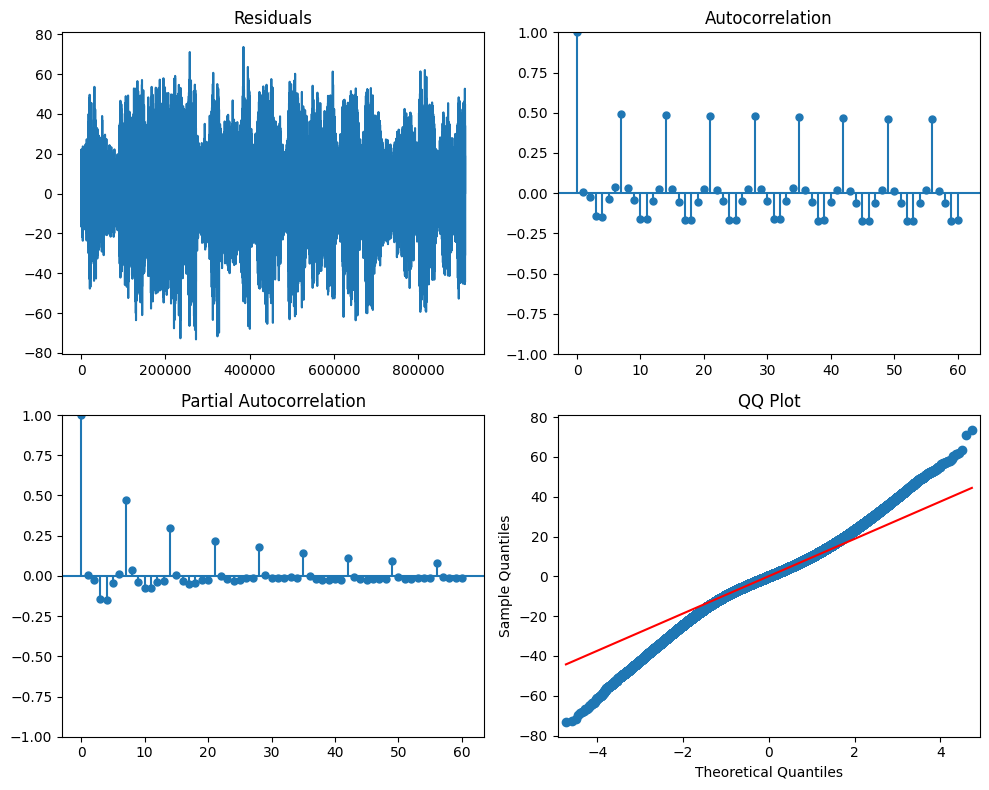

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Plot residuals
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.plot(model_fit.resid)
plt.title('Residuals')

# ACF and PACF plots
plt.subplot(222)
plot_acf(model_fit.resid, ax=plt.gca())
plt.subplot(223)
plot_pacf(model_fit.resid, ax=plt.gca())

# QQ plot
plt.subplot(224)
qqplot(model_fit.resid, line='q', ax=plt.gca())
plt.title('QQ Plot')

plt.tight_layout()
plt.show()


In [29]:
# Forecast
n_periods = 24
forecast = model_fit.forecast(steps=n_periods)

# Confidence intervals
forecast_ci = model_fit.get_forecast(steps=n_periods).conf_int()

# Extract lower and upper confidence bounds
lower_series = forecast_ci[:, 0]
upper_series = forecast_ci[:, 1]

# make series for plotting purpose
index_of_fc = np.arange(len(df_data.sales), len(df_data.sales) + n_periods)
fc_series = pd.Series(forecast, index=index_of_fc)
lower_series = pd.Series(lower_series, index=index_of_fc)
upper_series = pd.Series(upper_series, index=index_of_fc)

# Plot
plt.plot(df_data.sales)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

In [42]:
import pandas as pd

# Read the CSV file with header and column names
data = pd.read_csv("train.csv", names=['date', 'store', 'item', 'sales'])

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
print(data.head())


            store  item  sales
date                          
2017-01-01      1     1     19
2017-01-02      1     1     15
2017-01-03      1     1     10
2017-01-04      1     1     16
2017-01-05      1     1     14


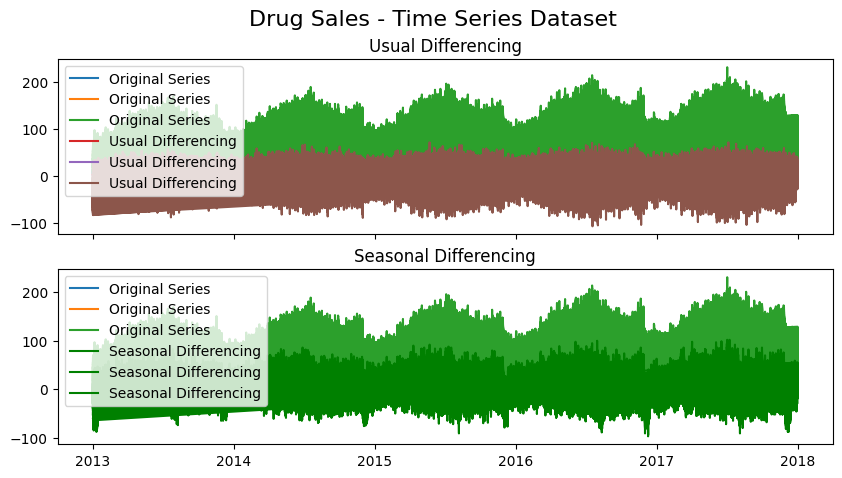

In [43]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

In [44]:
import pmdarima as pm

In [52]:
import pmdarima as pm

# Assuming 'data' is your DataFrame with multiple columns
# Specify the column containing the time series data
time_series_data = data['sales']

# Fit the Auto ARIMA model
smodel = pm.auto_arima(time_series_data, start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3, m=12,
                        start_P=0, seasonal=True,
                        d=None, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

# Display model summary
print(smodel.summary())


Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [49]:
data = pd.read_csv("train.csv", names=['date', 'store', 'item', 'sales'])

In [51]:
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()


NameError: name 'smodel' is not defined